In [4]:
from keras.models import Sequential
from keras import layers
from keras.preprocessing.text import Tokenizer
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Embedding, Flatten
from sklearn.datasets import fetch_20newsgroups


In [10]:
categories = ['alt.atheism', 'sci.space','misc.forsale',
 'rec.autos']
df = fetch_20newsgroups(subset='train', shuffle=True, categories=categories)
sentences=df.data
y=df.target

In [11]:
le = preprocessing.LabelEncoder()
y = le.fit_transform(y) 

In [12]:
tokenizer = Tokenizer(num_words=2000)
tokenizer.fit_on_texts(sentences)
max_review_len = max([len(s.split()) for s in sentences])
vocab_size = len(tokenizer.word_index)+1
X_train, X_test, y_train, y_test = train_test_split(sentences, y, test_size=0.25, random_state=1000)
X_train_tokens = tokenizer.texts_to_sequences(X_train)
X_test_tokens = tokenizer.texts_to_sequences(X_test)
padded_train = pad_sequences(X_train_tokens,maxlen=max_review_len)
paded_test = pad_sequences(X_test_tokens,maxlen=max_review_len)

In [14]:
model = Sequential()
model.add(Embedding(vocab_size, 50, input_length=max_review_len))
model.add(Flatten())
model.add(layers.Dense(300, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid')) #changing number of neuron to 2 as we have only two labels Pos and Neg
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['acc'])
history=model.fit(padded_train,y_train, epochs=5, verbose=True, validation_data=(paded_test,y_test), batch_size=256)

Epoch 1/5
7/7 [==============================] - 13s 2s/step - loss: -187.4027 - acc: 0.2451 - val_loss: -382.7798 - val_acc: 0.2789
Epoch 2/5
7/7 [==============================] - 17s 2s/step - loss: -837.7794 - acc: 0.2534 - val_loss: -1063.3995 - val_acc: 0.2789
Epoch 3/5
7/7 [==============================] - 19s 3s/step - loss: -1924.6896 - acc: 0.2534 - val_loss: -2163.5498 - val_acc: 0.2789
Epoch 4/5
7/7 [==============================] - 18s 3s/step - loss: -3670.7253 - acc: 0.2534 - val_loss: -3860.9729 - val_acc: 0.2789
Epoch 5/5
7/7 [==============================] - 18s 3s/step - loss: -6324.7437 - acc: 0.2534 - val_loss: -6358.2256 - val_acc: 0.2789


In [15]:
test_loss, test_acc = model.evaluate(paded_test, y_test)
print(test_acc)

18/18 [==============================] - 2s 108ms/step - loss: -6358.2261 - acc: 0.2789
0.27886322140693665


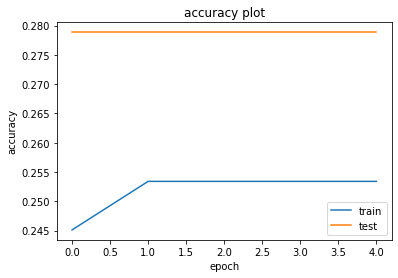

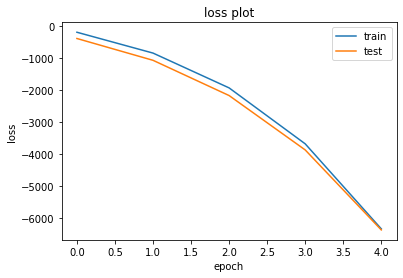

In [18]:
#bonus question 1
import matplotlib.pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('accuracy plot')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

#loss graph
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss plot')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

In [30]:
#bonus question 2
pp=model.predict_classes(paded_test[[3],:]) 
print("Actual Prediction",y_test[3],"Predicted Prediction",pp)

Actual Prediction 2 Predicted Prediction [[1]]
